# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [27]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [28]:
df = pd.read_csv('./data/comprar_alquilar.csv')
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

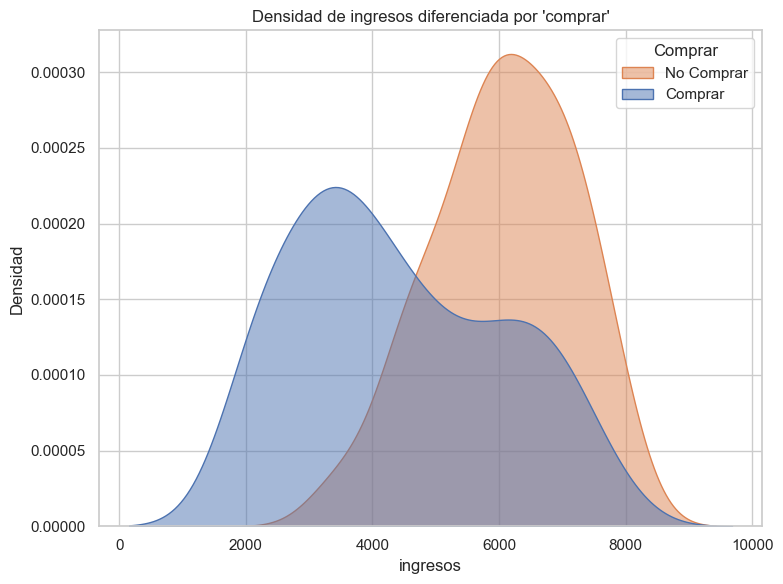

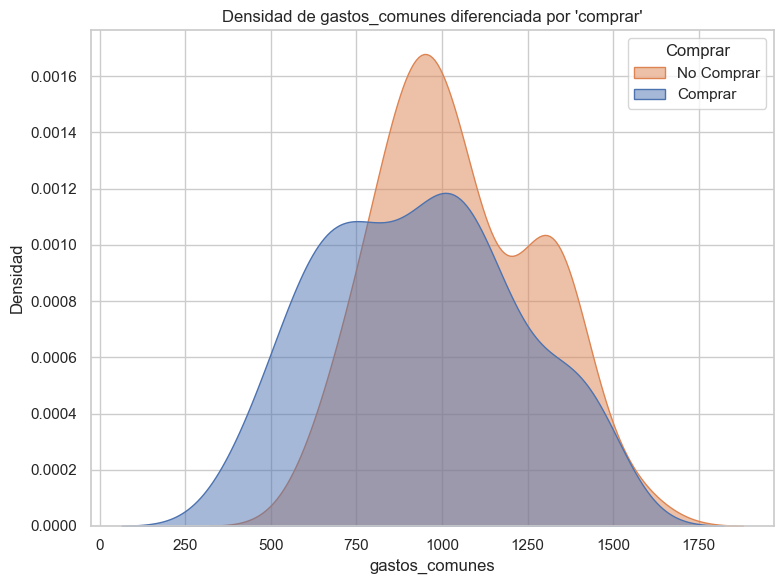

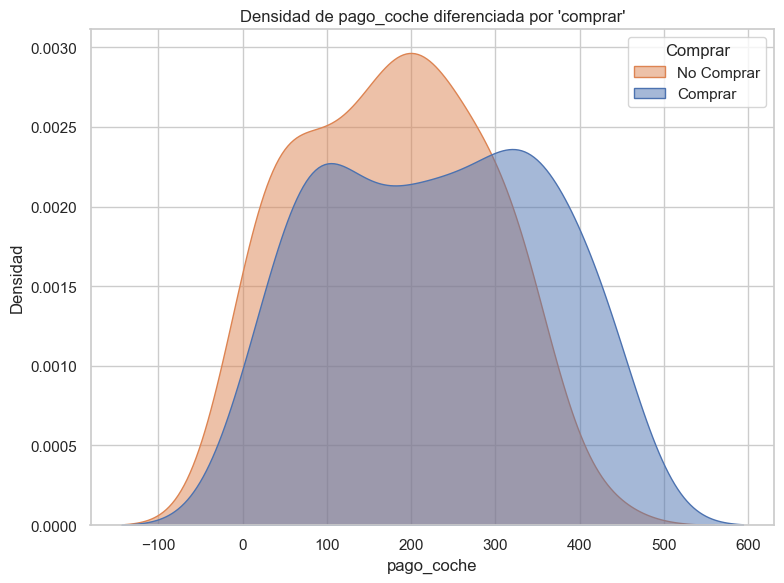

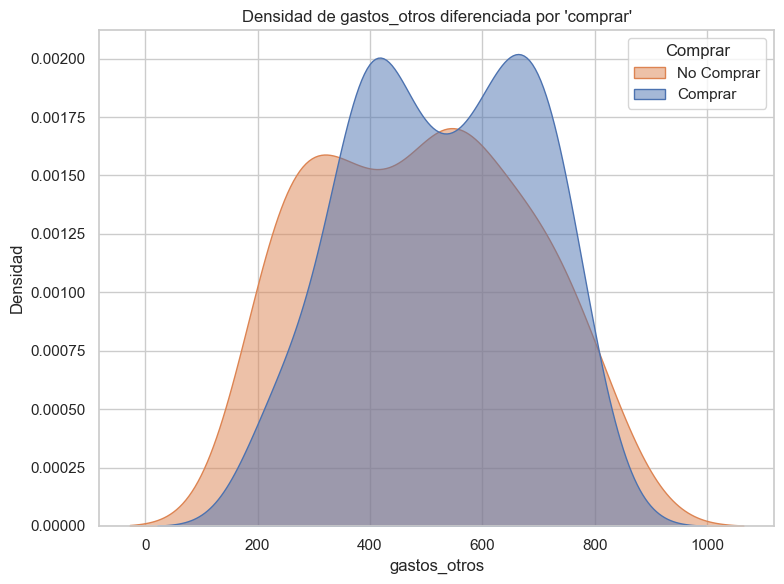

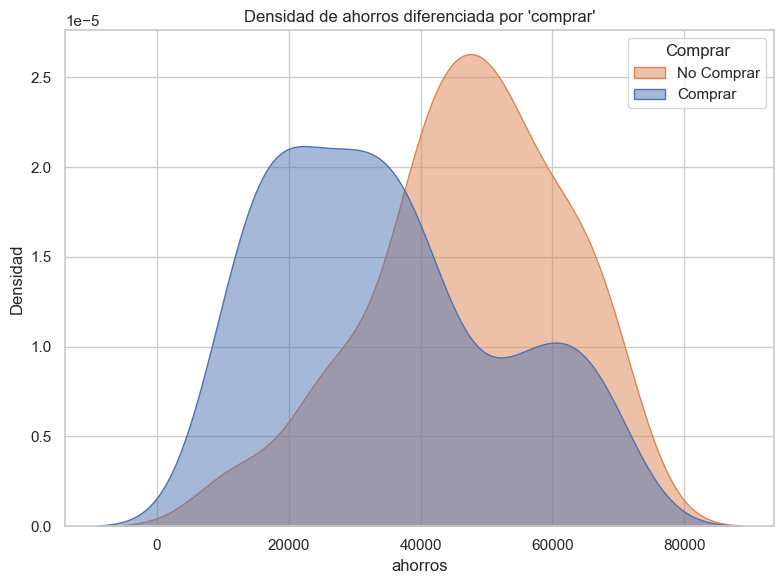

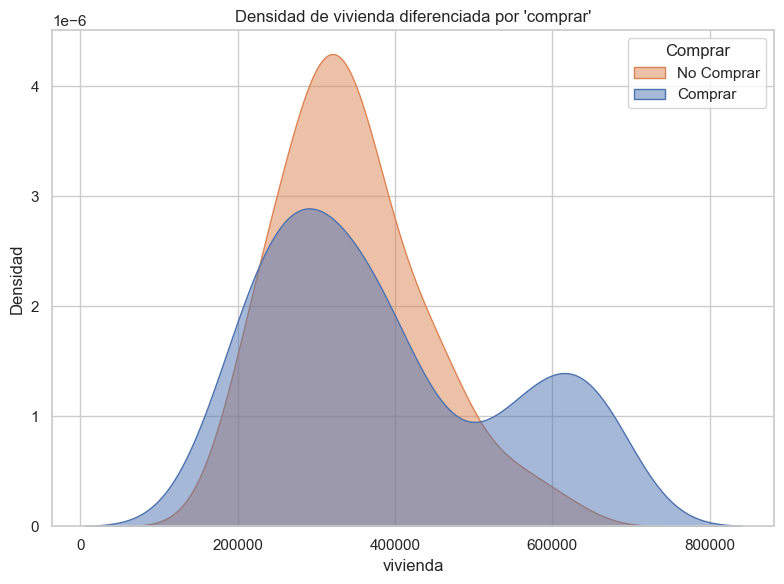

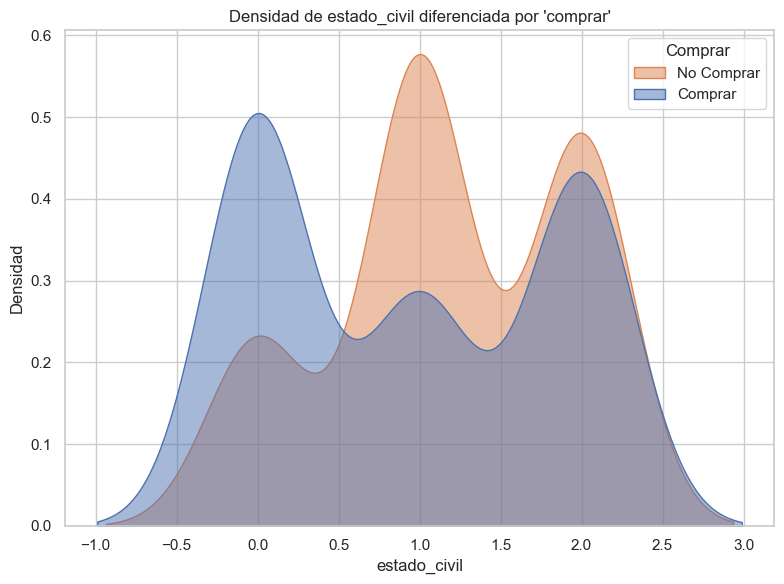

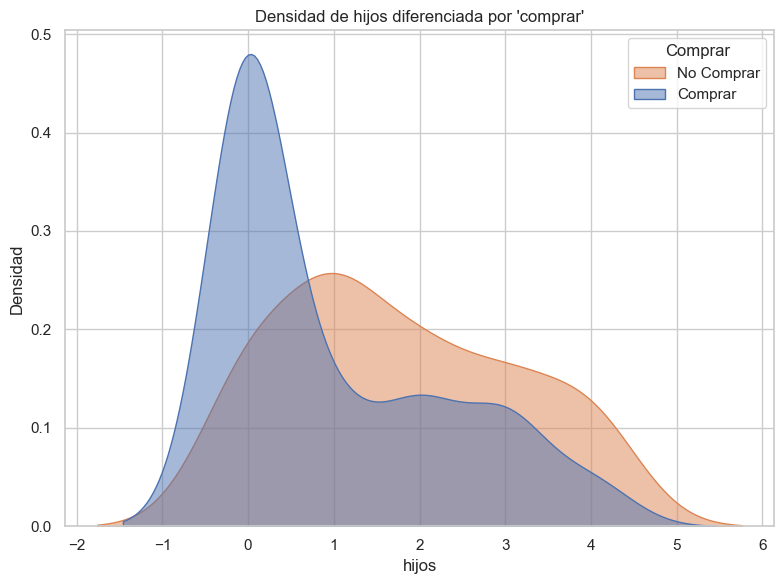

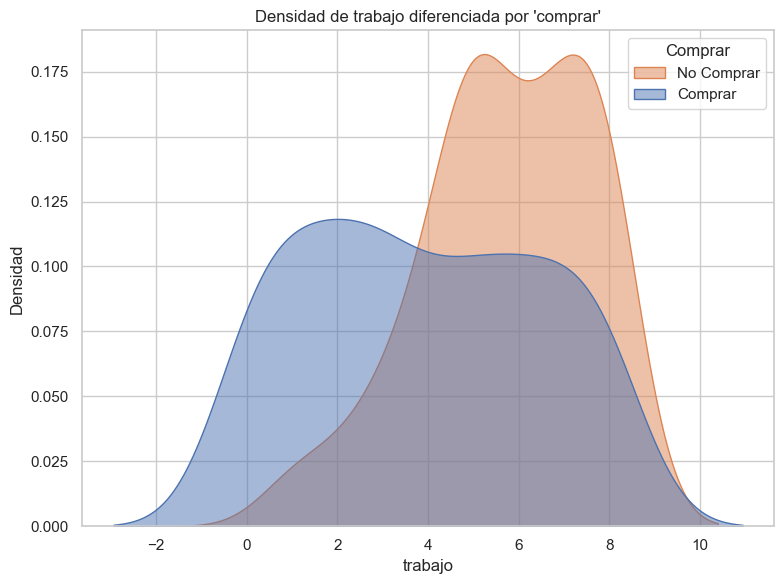

In [30]:
sns.set(style="whitegrid")
variables = [col for col in df.columns if col != 'comprar']

for variable in variables:
    plt.figure(figsize=(8, 6))
    if df[variable].dtype == 'object':  # Variables categóricas
        sns.countplot(data=df, x=variable, hue='comprar')
        plt.title(f"Distribución de {variable} diferenciada por 'comprar'")
    else:  # Variables numéricas
        sns.kdeplot(data=df, x=variable, hue='comprar', fill=True, common_norm=False, alpha=0.5)
        plt.title(f"Densidad de {variable} diferenciada por 'comprar'")
    
    # Etiquetas de los ejes
    plt.xlabel(variable)
    plt.ylabel("Frecuencia" if df[variable].dtype == 'object' else "Densidad")
    
    # Leyenda personalizada
    plt.legend(
        title='Comprar',
        labels=['No Comprar', 'Comprar'],  # Ajusta según los valores del target
        loc='best'
    )
    
    # Ajustar diseño y mostrar gráfica
    plt.tight_layout()
    plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [31]:
X = df.drop(columns=['comprar'])  # Variables independientes
y = df['comprar'] 

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [33]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

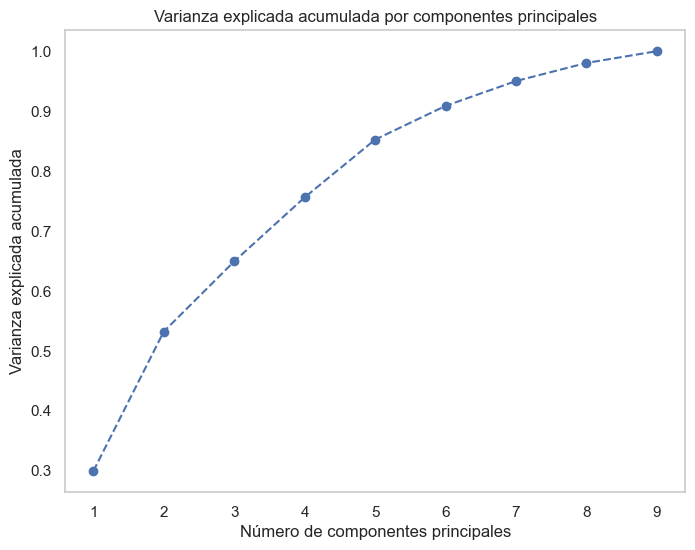

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

In [35]:
for i, var in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"Componente principal {i}: {var:.2%} de varianza explicada")

Componente principal 1: 29.91% de varianza explicada
Componente principal 2: 23.29% de varianza explicada
Componente principal 3: 11.71% de varianza explicada
Componente principal 4: 10.69% de varianza explicada
Componente principal 5: 9.64% de varianza explicada
Componente principal 6: 5.63% de varianza explicada
Componente principal 7: 4.15% de varianza explicada
Componente principal 8: 3.02% de varianza explicada
Componente principal 9: 1.97% de varianza explicada


In [36]:
# Varianza acumulada 5 componentes = 29.91% + 23.29% + 11.71% + 10.69% + 9.64% = 85.24%

### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

In [ ]:
# Está arriba

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

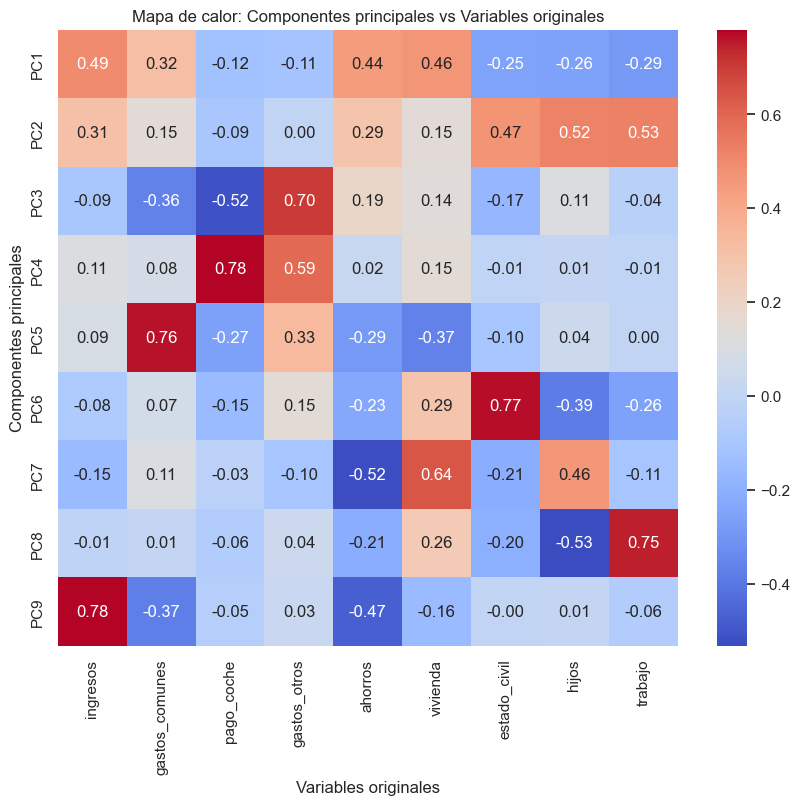

In [37]:
pca_components = pd.DataFrame(pca.components_, 
                              columns=X.columns, 
                              index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor: Componentes principales vs Variables originales')
plt.xlabel('Variables originales')
plt.ylabel('Componentes principales')
plt.show()

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestClassifier(random_state=42)) 
])

In [41]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [42]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [43]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy en entrenamiento: {accuracy_train:.2f}")
print(f"Accuracy en prueba: {accuracy_test:.2f}")

Accuracy en entrenamiento: 1.00
Accuracy en prueba: 0.73


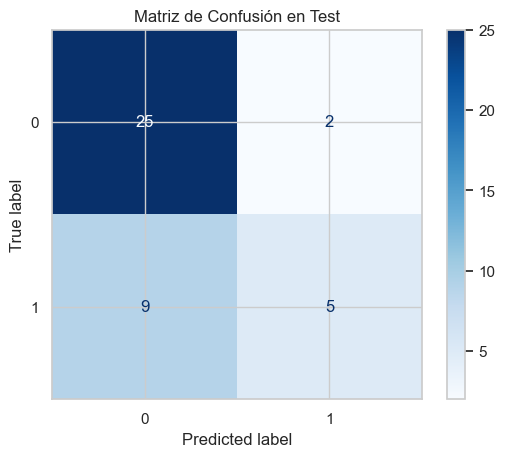

In [44]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión en Test")
plt.show()

In [49]:
param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9], 
    'classifier__n_estimators': [50, 100, 150],  
    'classifier__max_depth': [None, 10, 20], 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [50, 100, 150],
                         'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [50]:
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.2f}")

Mejores parámetros: {'classifier__max_depth': None, 'classifier__n_estimators': 100, 'pca__n_components': 7}
Mejor accuracy en validación cruzada: 0.87


In [51]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best_test = accuracy_score(y_test, y_pred_best)
print(f"Accuracy del mejor modelo en el conjunto de prueba: {accuracy_best_test:.2f}")


Accuracy del mejor modelo en el conjunto de prueba: 0.73
